## Movie Database Viz using Seaborn

Important note: Original Dataset curation is © Kirill Eremenko from the Python Programming A-Z™ course, corresponding to the first half of the Advance Visualization classes on mentioned course in Udemy.

Notebook presentation my own, following the classes and course contents (with some aesthetic extras and minor changes to the code e.g: some variable names).

In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv('P4-Movie-Ratings.csv')

In [3]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [4]:
len(movies)

559

In [5]:
movies.describe()

,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [6]:
# changing columns name
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'Budget','Release']
movies.columns

Index(['Film', 'Genre', 'CriticRating', 'AudienceRating', 'Budget', 'Release'], dtype='object')

In [7]:
# changing columns containing "strings" to "category" data type variables. 
# Including Release because no operations are need to be performed with those numbers.

movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Release = movies.Release.astype('category')

In [8]:
# check to see that 'Release' is no longer included as a numeric type in the description statistics
movies.describe()

,CriticRating,AudienceRating,Budget
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


---------------------

## Visualization Exercises!

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### _Joint plot_

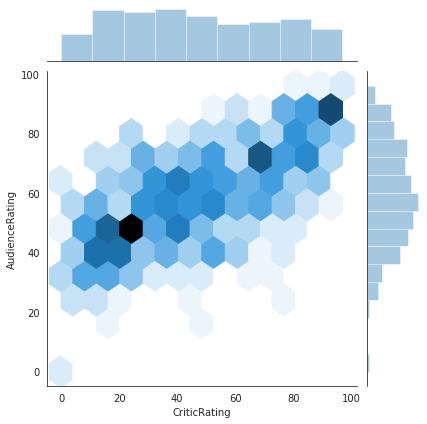

In [13]:
# JointPlot
sns.set_style("white")
j1 = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex')

--------------------------------

#### _Comparison between Seaborn Histogram (distplot) and Pyplot Histogram_

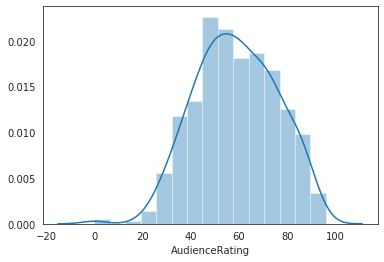

In [14]:
histo1 = sns.distplot(movies.AudienceRating, bins=15)

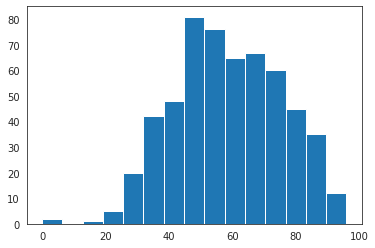

In [15]:
histo2 = plt.hist(movies.AudienceRating, bins=15)

--------------------------------

#### _Stacked Histograms_

In [16]:
movies[movies.Genre == 'Drama'].Budget  #subsetting the dataframe

10     30
11     20
13      7
18      8
23     20
       ..
529    66
532    38
534    21
541    15
545     2
Name: Budget, Length: 101, dtype: int64

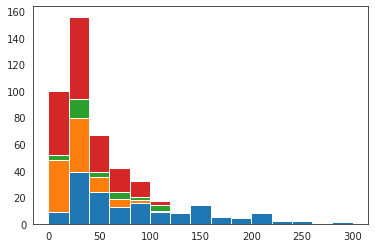

In [17]:
# Option 1: manually stacking the plots, using a list with the Genre filter

plt.hist([movies[movies.Genre == 'Action'].Budget, \
         movies[movies.Genre == 'Drama'].Budget, \
          movies[movies.Genre == 'Thriller'].Budget, \
         movies[movies.Genre == 'Comedy'].Budget], bins=15, stacked=True)
plt.show()

In [18]:
#Option 2: using a loop and passing all the movie genres as a category list
#model loop

for gen in movies.Genre.cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


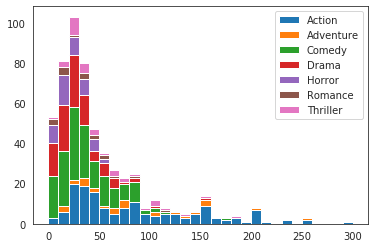

In [19]:
# integrating the genre filter and the category list in the loop
# doing the stacked histogram plot from the new list

genlist = []
genre_labels = []

for gen in movies.Genre.cat.categories:
    genlist.append(movies[movies.Genre == gen].Budget)
    genre_labels.append(gen)
    
h = plt.hist(genlist, bins=30, stacked=True, rwidth=1, label=genre_labels)
plt.legend()
plt.show()

--------------------------------

#### _KDE (Kernel Density Estimate) plot_

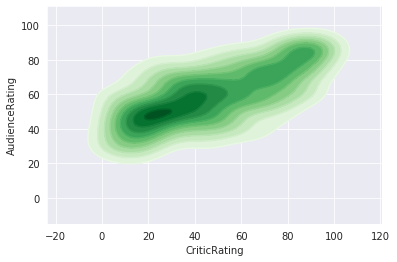

In [40]:
sns.set_style("darkgrid")
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Greens')

k1b= sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Greens')